# Atividade MC 2 - Implementação de Gradiente Descendente e Redes Neurais

Bibliotecas necessárias:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Configuração para melhorar a visualização dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## Questão A: Gradiente Descendente (Regressão Linear)

**Objetivo:** Implementar o procedimento dos slides 156-213.
* **Dados:** Altura vs Peso.
* **Modelo:** `Altura = Intercept + 0.64 * Peso` (O declive/slope é fixo em 0.64).
* **Tarefa:** Otimizar o **Intercept** começando de 0.
* **Visualização:** Mostrar o movimento da reta e a descida na curva de custo (SSR).
* **Condições de parada:** Número máximo de iterações OU Step Size muito pequeno.


--- Iniciando Gradiente Descendente (LR: 0.1) ---
Iter 1: Old Intercept=0.000, Step Size=-0.570, New Intercept=0.570, Slope(Grad)=-5.704


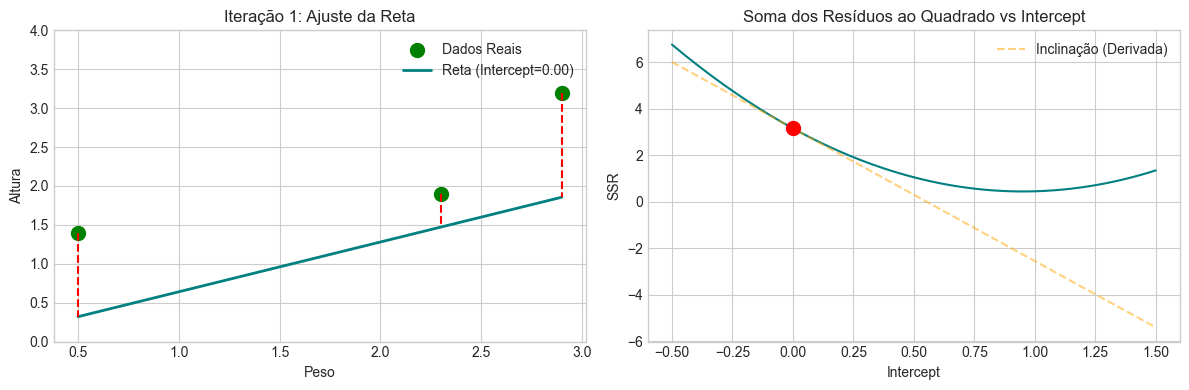

Iter 2: Old Intercept=0.570, Step Size=-0.228, New Intercept=0.799, Slope(Grad)=-2.282


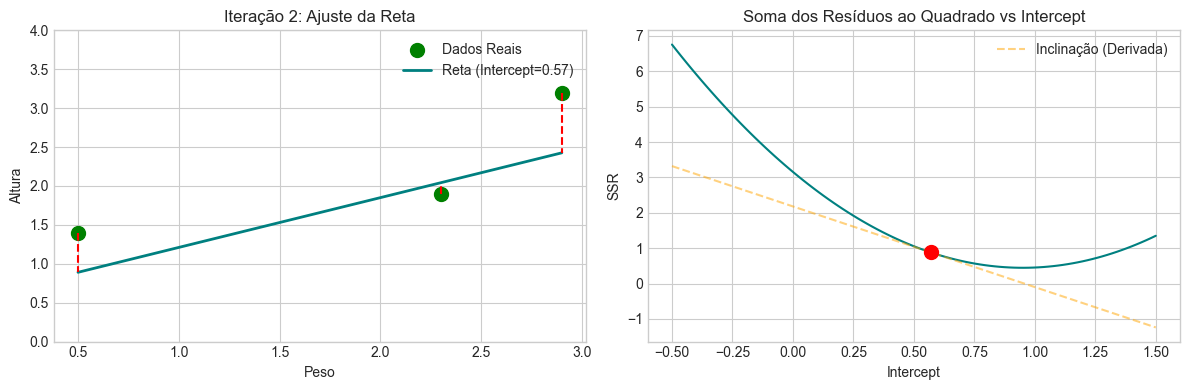

Iter 3: Old Intercept=0.799, Step Size=-0.091, New Intercept=0.890, Slope(Grad)=-0.913


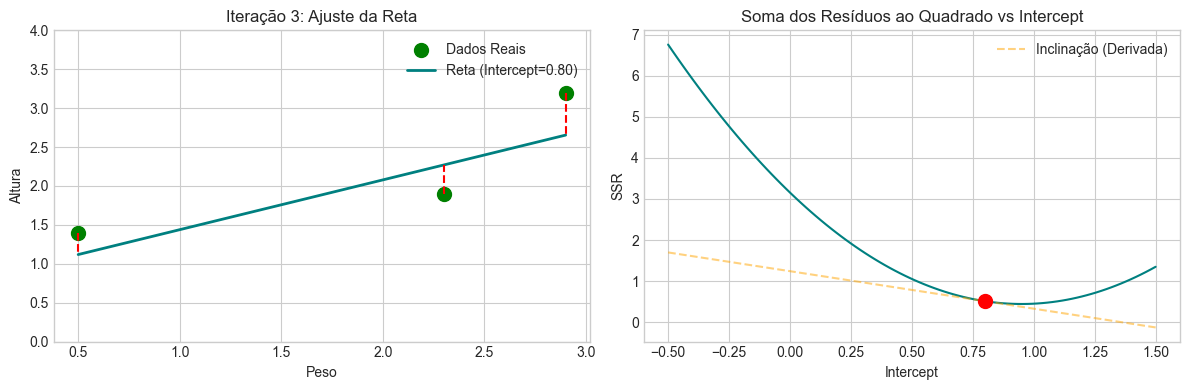

Iter 4: Old Intercept=0.890, Step Size=-0.037, New Intercept=0.926, Slope(Grad)=-0.365


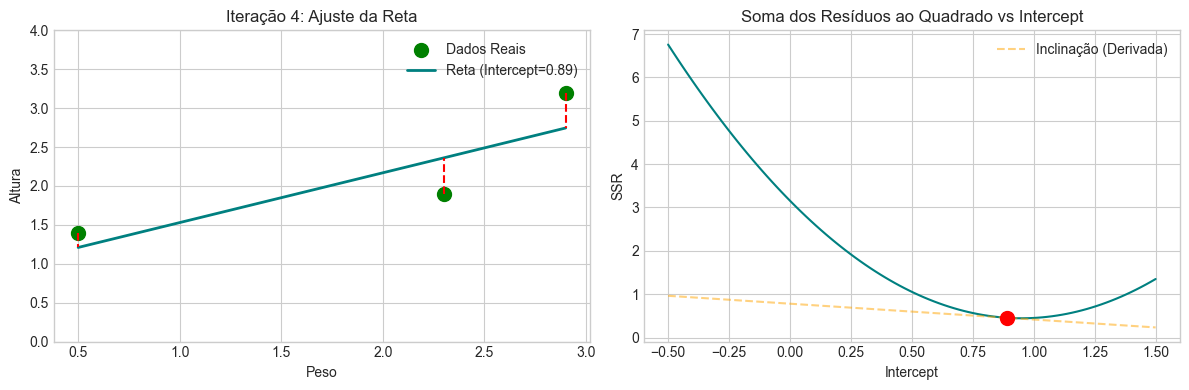

Iter 5: Old Intercept=0.926, Step Size=-0.015, New Intercept=0.941, Slope(Grad)=-0.146


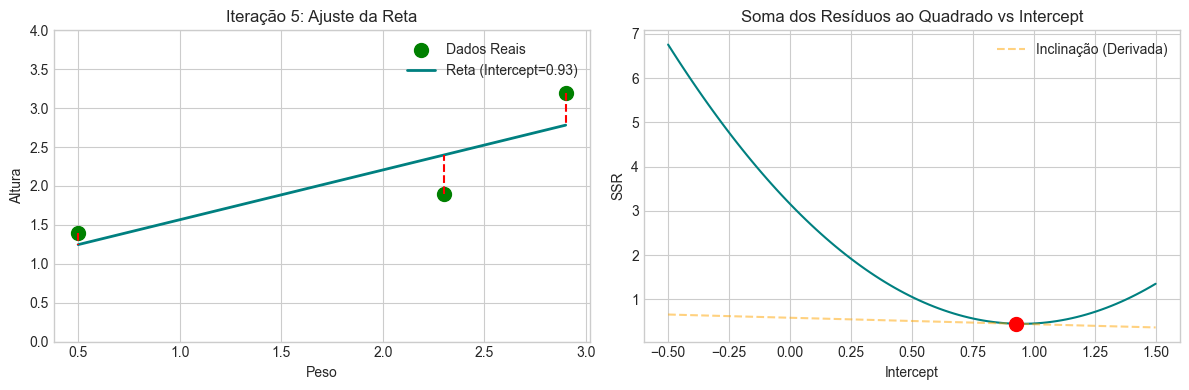

Iter 6: Old Intercept=0.941, Step Size=-0.006, New Intercept=0.947, Slope(Grad)=-0.058


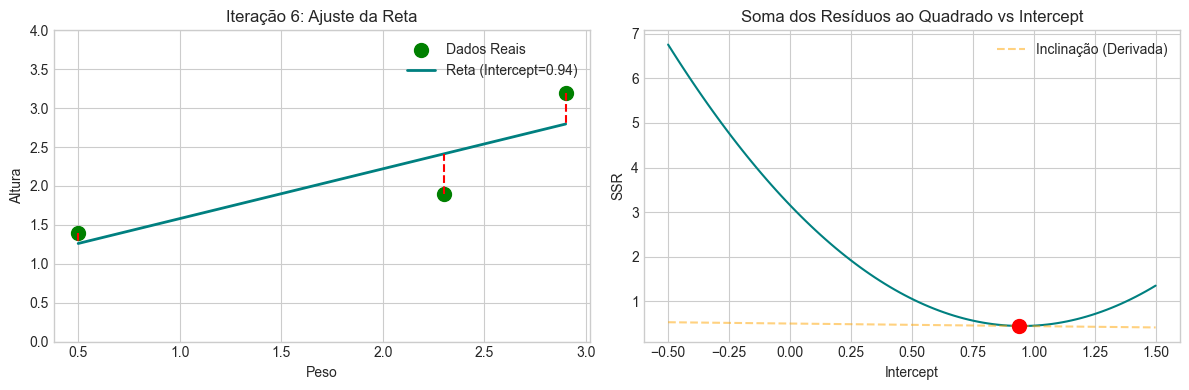

Iter 7: Old Intercept=0.947, Step Size=-0.002, New Intercept=0.949, Slope(Grad)=-0.023


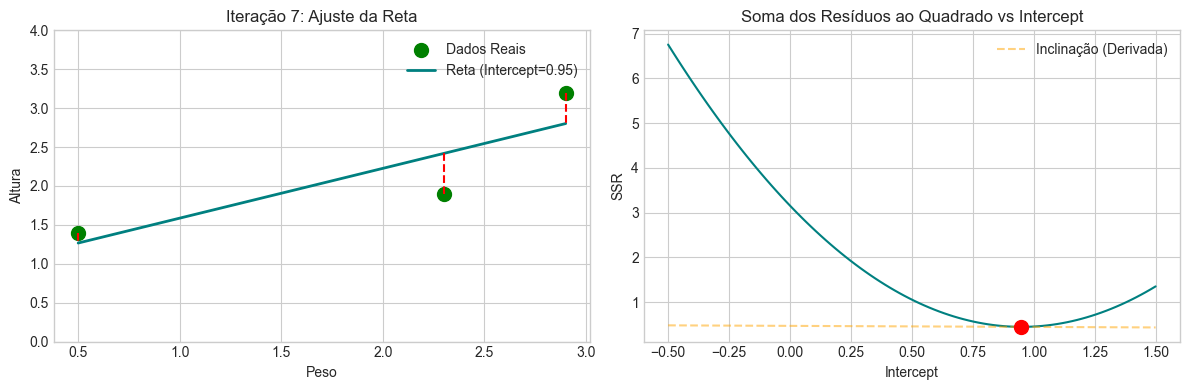

Iter 8: Old Intercept=0.949, Step Size=-0.001, New Intercept=0.950, Slope(Grad)=-0.009


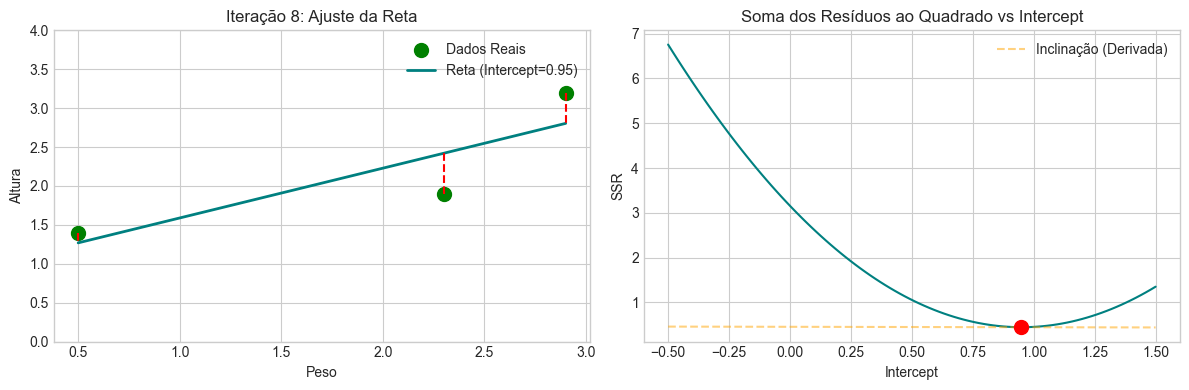

-> Convergência alcançada (Step Size pequeno).
Resultado Final para LR 0.1: Intercept = 0.9500

--- Iniciando Gradiente Descendente (LR: 0.01) ---
Iter 1: Old Intercept=0.000, Step Size=-0.057, New Intercept=0.057, Slope(Grad)=-5.704


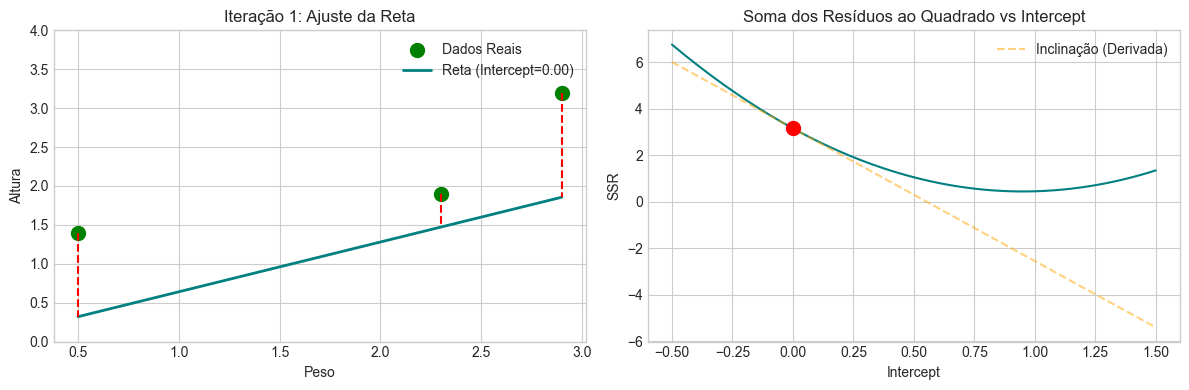

Iter 2: Old Intercept=0.057, Step Size=-0.054, New Intercept=0.111, Slope(Grad)=-5.362


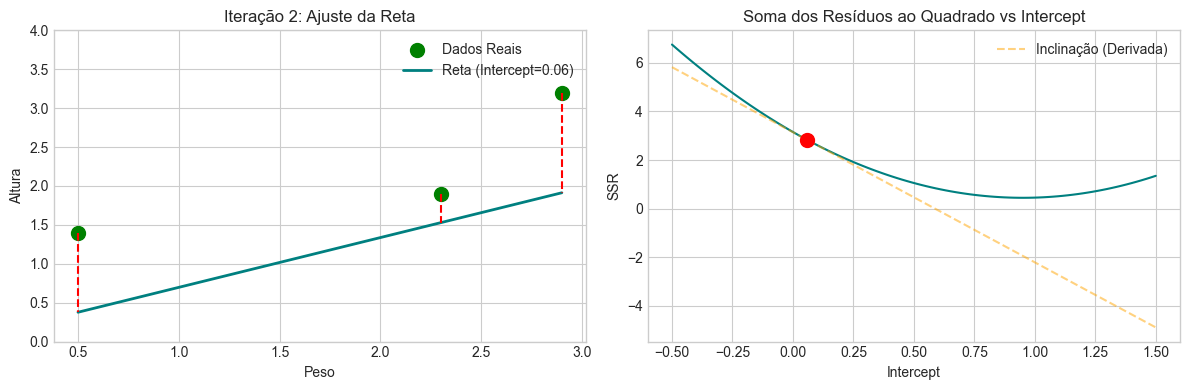

Iter 3: Old Intercept=0.111, Step Size=-0.050, New Intercept=0.161, Slope(Grad)=-5.040


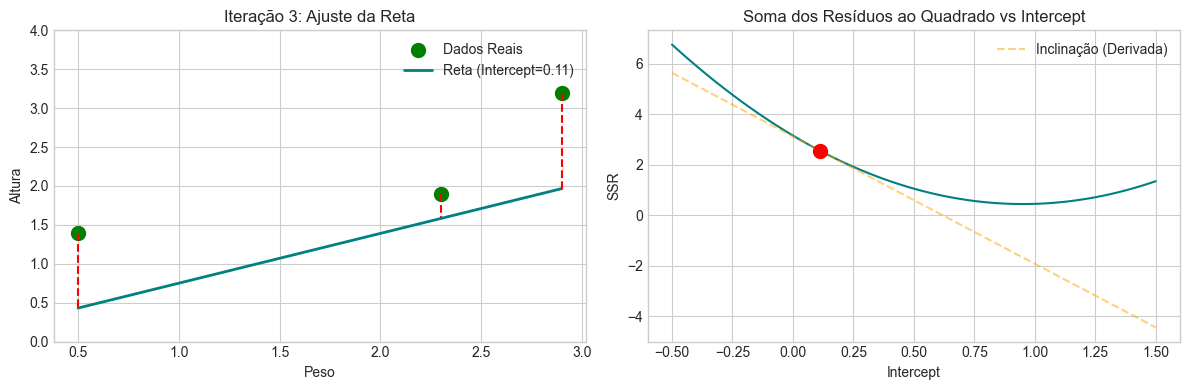

Iter 4: Old Intercept=0.161, Step Size=-0.047, New Intercept=0.208, Slope(Grad)=-4.738


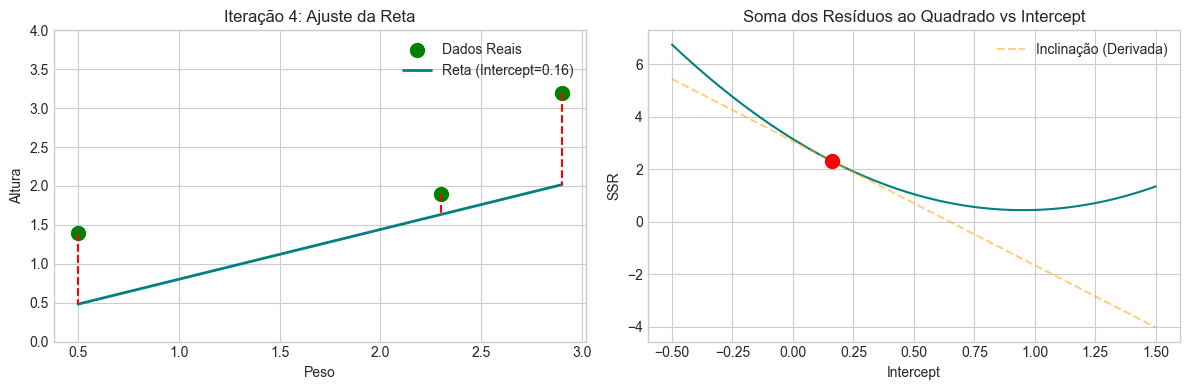

Iter 5: Old Intercept=0.208, Step Size=-0.045, New Intercept=0.253, Slope(Grad)=-4.453


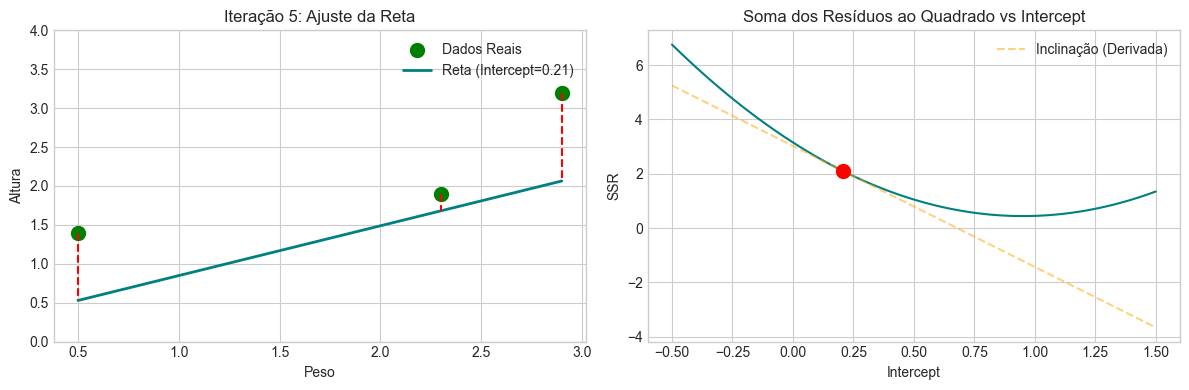

Iter 6: Old Intercept=0.253, Step Size=-0.042, New Intercept=0.295, Slope(Grad)=-4.186


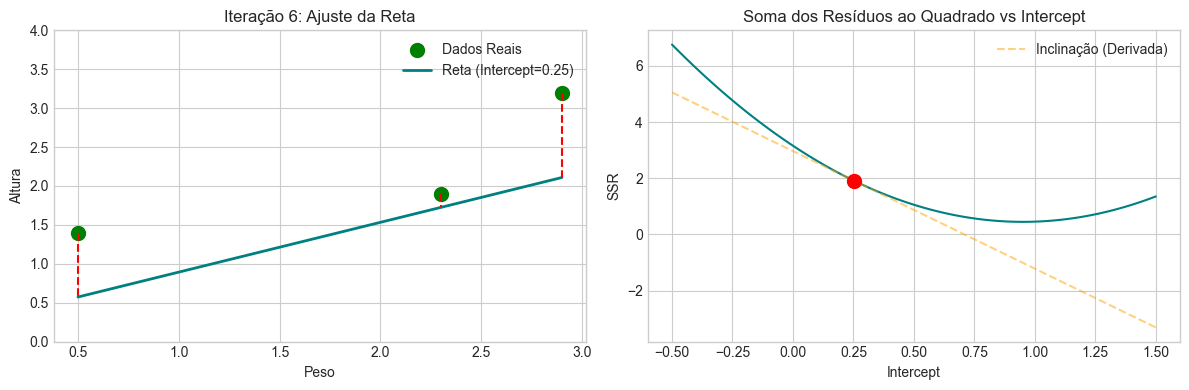

Iter 7: Old Intercept=0.295, Step Size=-0.039, New Intercept=0.334, Slope(Grad)=-3.935


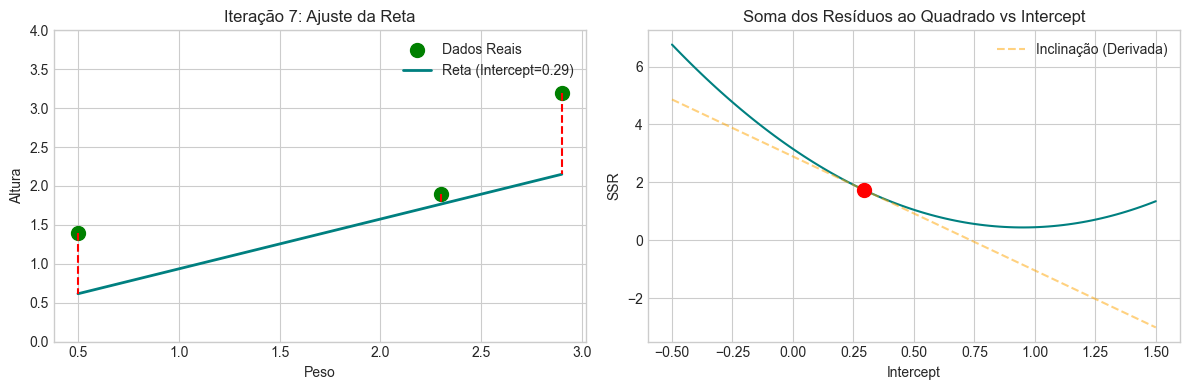

Iter 8: Old Intercept=0.334, Step Size=-0.037, New Intercept=0.371, Slope(Grad)=-3.699


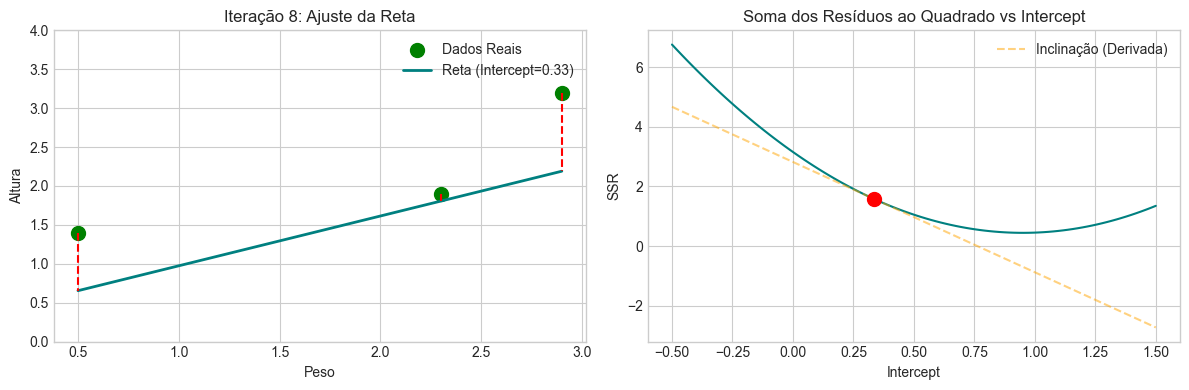

Iter 9: Old Intercept=0.371, Step Size=-0.035, New Intercept=0.406, Slope(Grad)=-3.477


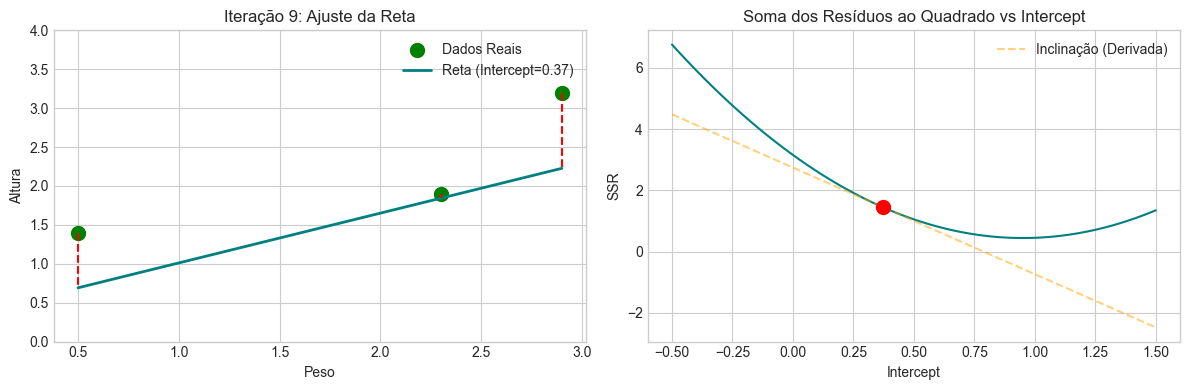

Iter 10: Old Intercept=0.406, Step Size=-0.033, New Intercept=0.439, Slope(Grad)=-3.268


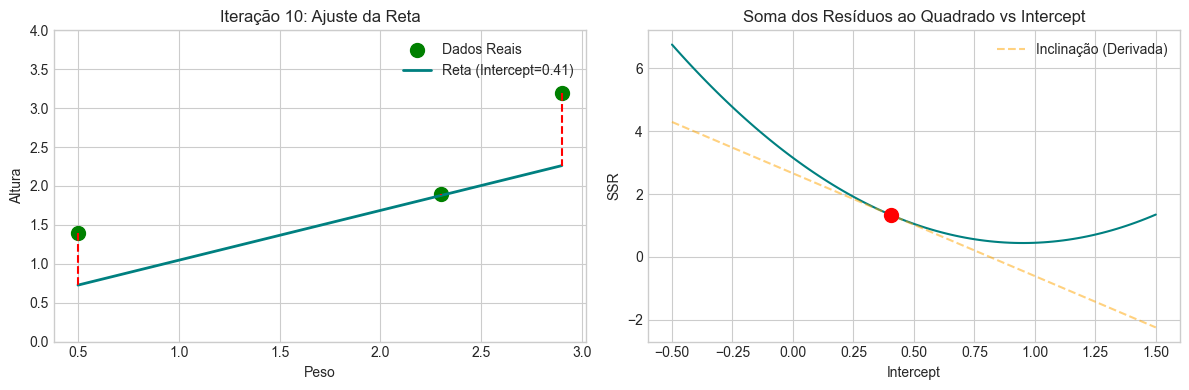

Iter 11: Old Intercept=0.439, Step Size=-0.031, New Intercept=0.469, Slope(Grad)=-3.072


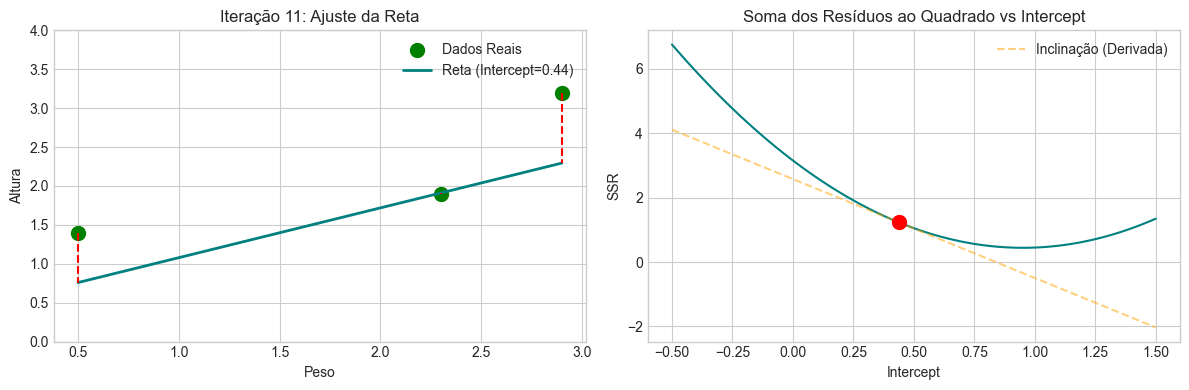

Iter 12: Old Intercept=0.469, Step Size=-0.029, New Intercept=0.498, Slope(Grad)=-2.888


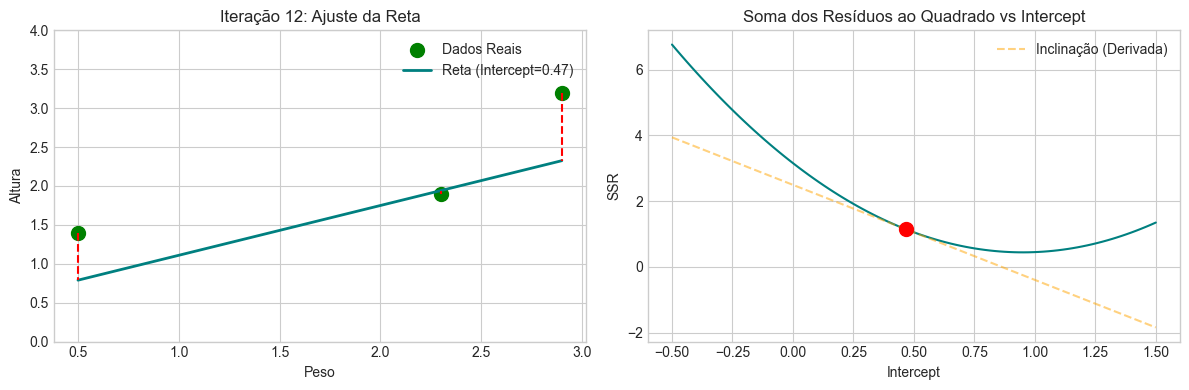

Iter 13: Old Intercept=0.498, Step Size=-0.027, New Intercept=0.525, Slope(Grad)=-2.715


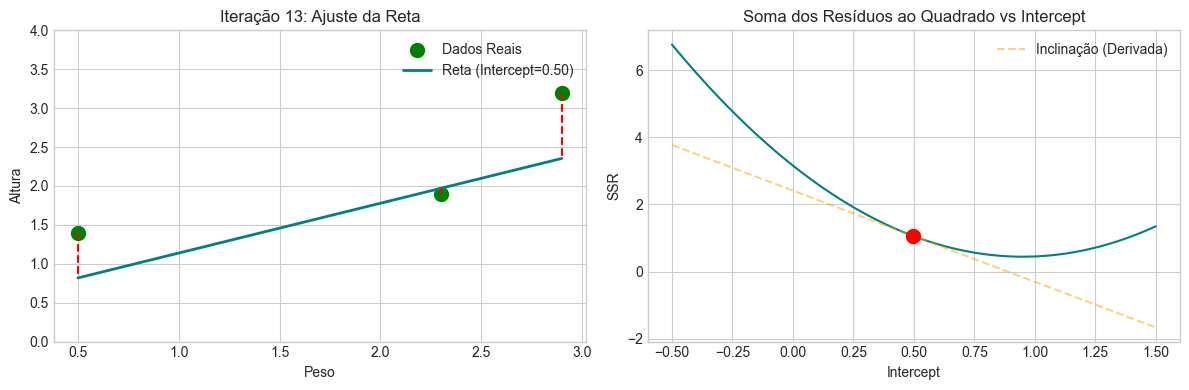

Iter 14: Old Intercept=0.525, Step Size=-0.026, New Intercept=0.551, Slope(Grad)=-2.552


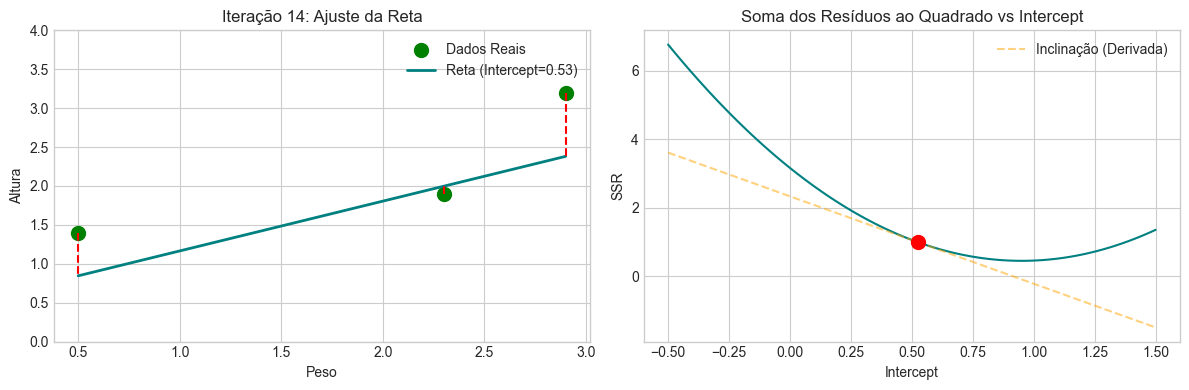

Iter 15: Old Intercept=0.551, Step Size=-0.024, New Intercept=0.575, Slope(Grad)=-2.399


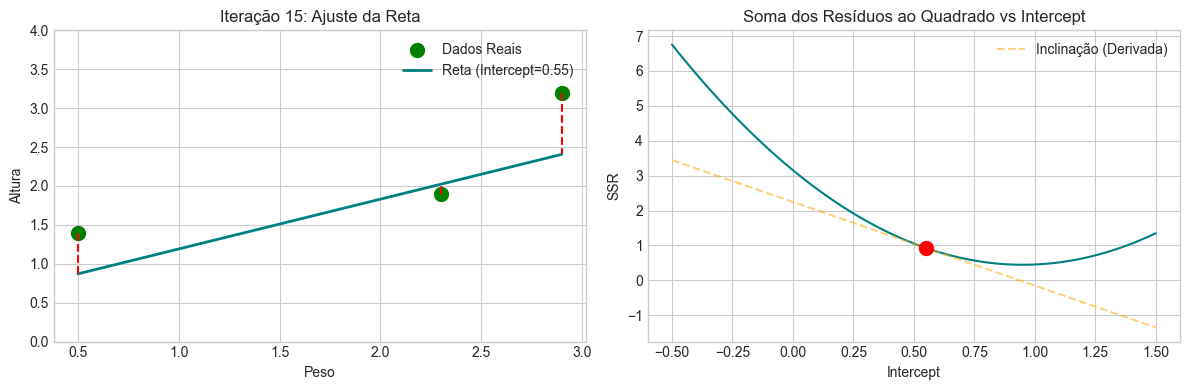

Iter 16: Old Intercept=0.575, Step Size=-0.023, New Intercept=0.597, Slope(Grad)=-2.255


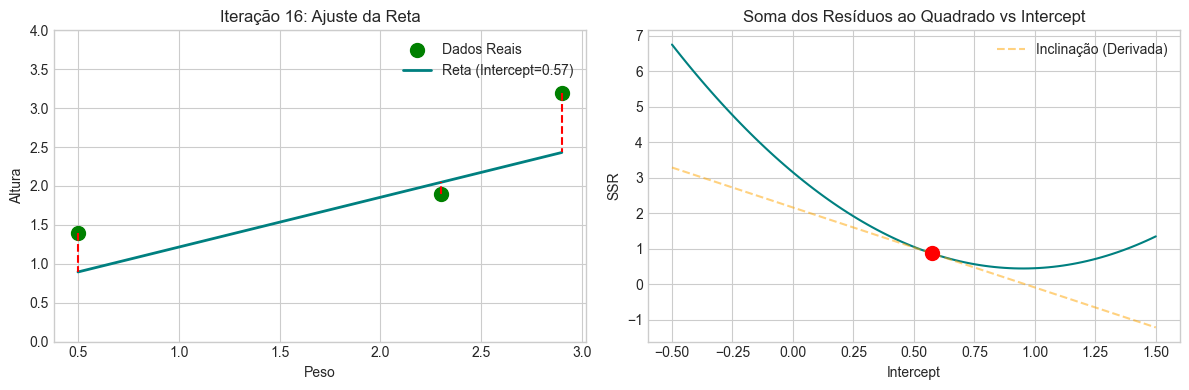

Iter 17: Old Intercept=0.597, Step Size=-0.021, New Intercept=0.619, Slope(Grad)=-2.119


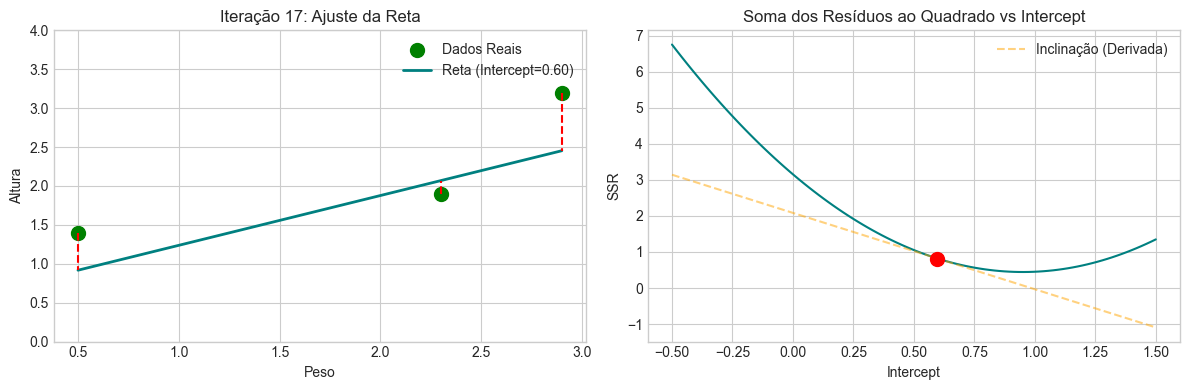

Iter 18: Old Intercept=0.619, Step Size=-0.020, New Intercept=0.639, Slope(Grad)=-1.992


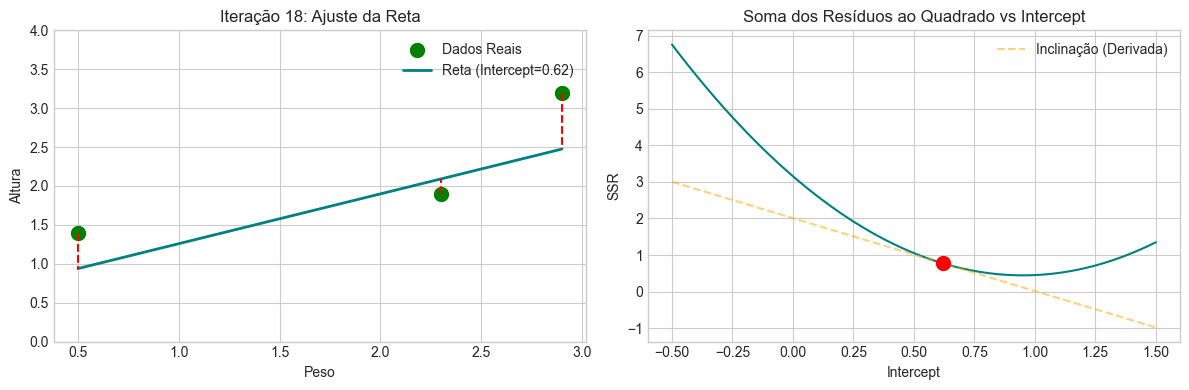

Iter 19: Old Intercept=0.639, Step Size=-0.019, New Intercept=0.657, Slope(Grad)=-1.873


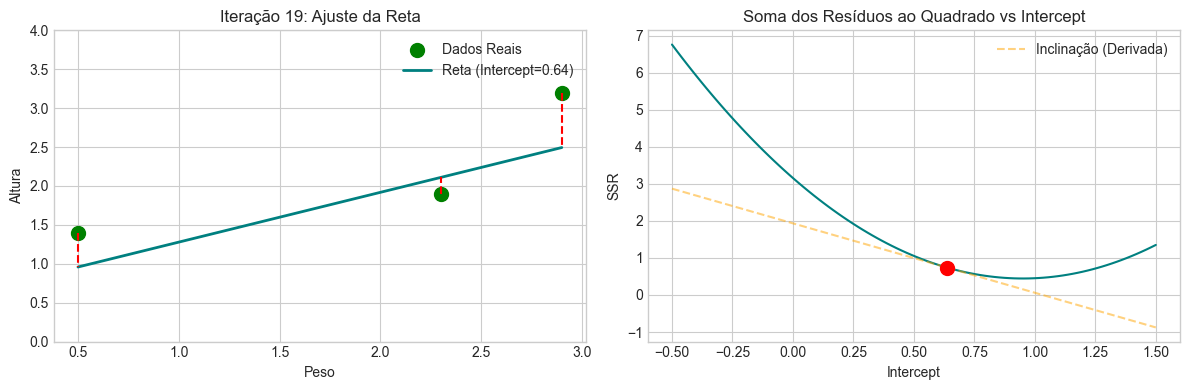

Iter 20: Old Intercept=0.657, Step Size=-0.018, New Intercept=0.675, Slope(Grad)=-1.760


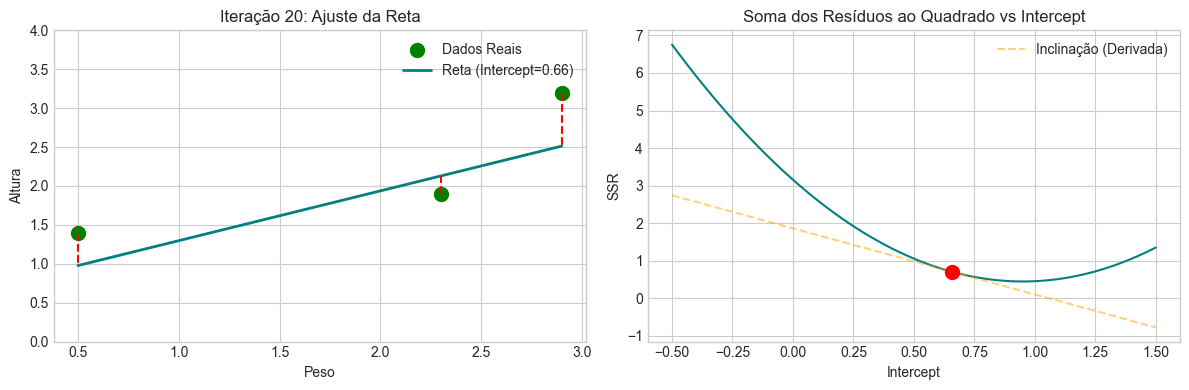

Resultado Final para LR 0.01: Intercept = 0.6749


In [11]:
def run_question_a(learning_rate, max_iter=20, tolerance=0.001):
    #dados do slide 
    weights = np.array([0.5, 2.3, 2.9])
    heights = np.array([1.4, 1.9, 3.2])
    
    #parâmetros Iniciais que foram definidos no slide
    slope_fixed = 0.64
    intercept = 0.0  #começa em 0 como esta no slide
    
    #para plotagem da curva de custo
    intercept_vals = np.linspace(-0.5, 1.5, 100)
    ssr_vals = []
    for i in intercept_vals:
        predicted = i + slope_fixed * weights
        #formula do ssr
        residuals = heights - predicted
        ssr_vals.append(np.sum(residuals**2))
        
    print(f"\n--- Iniciando Gradiente Descendente (LR: {learning_rate}) ---")
    
    #loop para otimização do intercept
    for i in range(max_iter):
        #calcular Predições e Derivada
        predicted_heights = intercept + slope_fixed * weights
        
        #calculo do predicted e da derivada
        residuals = heights - predicted_heights
        derivative = np.sum(-2 * residuals)
        
        # calcular Step Size
        step_size = derivative * learning_rate
        
        #guardar valor antigo para impressão
        old_intercept = intercept
        
        #atualizar intercept
        new_intercept = old_intercept - step_size
        
        print(f"Iter {i+1}: Old Intercept={old_intercept:.3f}, Step Size={step_size:.3f}, New Intercept={new_intercept:.3f}, Slope(Grad)={derivative:.3f}")
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        #grafico da reta de regressão
        axes[0].scatter(weights, heights, color='green', s=100, label='Dados Reais')
        axes[0].plot(weights, predicted_heights, color='teal', linewidth=2, label=f'Reta (Intercept={old_intercept:.2f})')

        for w, h, p in zip(weights, heights, predicted_heights):
            axes[0].plot([w, w], [h, p], color='red', linestyle='--')
        axes[0].set_title(f"Iteração {i+1}: Ajuste da Reta")
        axes[0].set_xlabel("Peso")
        axes[0].set_ylabel("Altura")
        axes[0].legend()
        axes[0].set_ylim(0, 4)
        
        # Gráfico da curva de custo
        current_ssr = np.sum((heights - (old_intercept + slope_fixed * weights))**2)
        axes[1].plot(intercept_vals, ssr_vals, color='teal')
        axes[1].scatter(old_intercept, current_ssr, color='red', s=100, zorder=5)
        #tangente (visualização do gradiente)
        tangent_line = derivative * (intercept_vals - old_intercept) + current_ssr
        axes[1].plot(intercept_vals, tangent_line, color='orange', linestyle='--', alpha=0.5, label='Inclinação (Derivada)')
        
        axes[1].set_title(f"Soma dos Resíduos ao Quadrado vs Intercept")
        axes[1].set_xlabel("Intercept")
        axes[1].set_ylabel("SSR")
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        intercept = new_intercept
        
        #condição de parada 2: step size muito pequeno
        if abs(step_size) < tolerance:
            print("-> Convergência alcançada (Step Size pequeno).")
            break
            
    print(f"Resultado Final para LR {learning_rate}: Intercept = {intercept:.4f}")


run_question_a(learning_rate=0.1)

run_question_a(learning_rate=0.01)

## Questão B: Gradiente Descendente Estocástico e Mini-Batch

**Objetivo:** Transformar o procedimento dos slides 302-335 em código.
* **Diferença:** Não atualizar usando a soma de *todos* os dados de uma vez, mas sim amostra por amostra (Estocástico) ou em pequenos grupos (Mini-batch).
* **Nota:** O gráfico complexo da Questão A não será gerado aqui, focaremos na convergência.

### B-1: Gradiente Descendente Estocástico (SGD)
Atualiza o intercept após calcular o erro para **cada** amostra individualmente.

--- SGD com Gráficos (Learning Rate: 0.1) ---
Epoch 1:


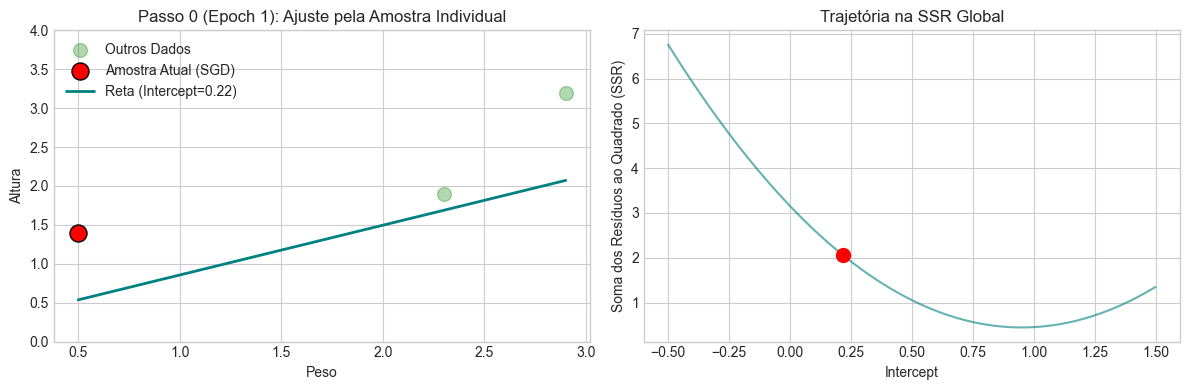

Amostra (w=0.5): Old=0.000, Step=-0.216, New=0.216


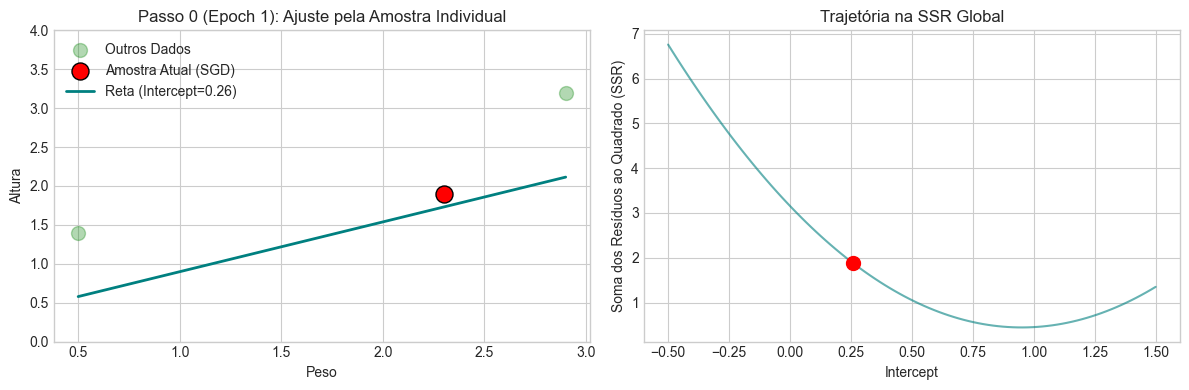

Amostra (w=2.3): Old=0.216, Step=-0.042, New=0.258


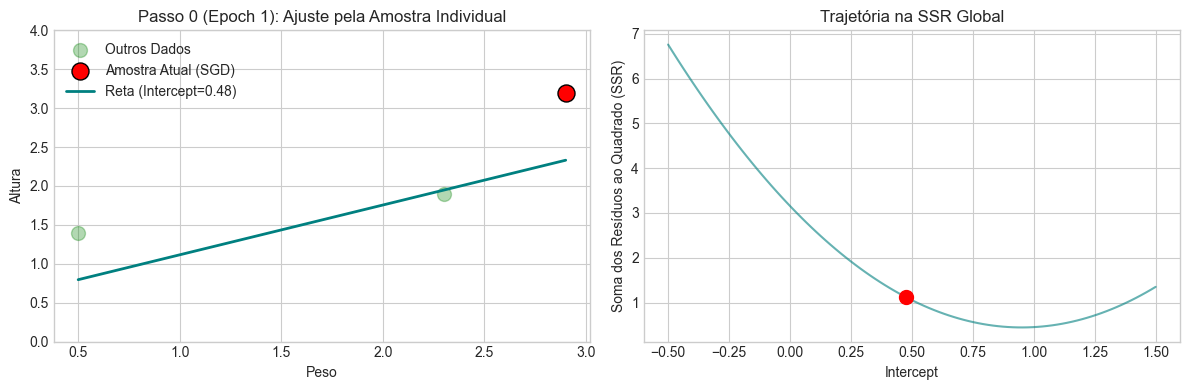

Amostra (w=2.9): Old=0.258, Step=-0.217, New=0.476
Final SGD Intercept= 0.4755


In [12]:
def run_sgd(learning_rate=0.1, epochs=5):
    weights = np.array([0.5, 2.3, 2.9])
    heights = np.array([1.4, 1.9, 3.2])
    
    slope_fixed = 0.64
    intercept = 0.0
    
    intercept_vals = np.linspace(-0.5, 1.5, 100)
    ssr_vals = []
    for i in intercept_vals:
        predicted = i + slope_fixed * weights
        residuals = heights - predicted
        ssr_vals.append(np.sum(residuals**2))

    print(f"--- SGD com Gráficos (Learning Rate: {learning_rate}) ---")

    step_count = 0

    for epoch in range(epochs):
        indices = np.arange(len(weights))
        np.random.shuffle(indices)
        
        print(f"Epoch {epoch+1}:")
        
        for i in indices:
            #vai selecionar apenas uma amostra
            w_sample = weights[i]
            h_sample = heights[i]
            
            pred_sample = intercept + slope_fixed * w_sample

            derivative = -2 * (h_sample - pred_sample)

            step_size = derivative * learning_rate
            
            old_intercept = intercept
            intercept = intercept - step_size
           
            #VISUALIZACAO
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            #grafico da reta de regressão
            axes[0].scatter(weights, heights, color='green', s=100, alpha=0.3, label='Outros Dados')#reta de regressão
            axes[0].scatter([w_sample], [h_sample], color='red', s=150, edgecolors='black', label='Amostra Atual (SGD)')#destaca o ponto atual usado no SGD

            #rreta atual
            predicted_all = intercept + slope_fixed * weights
            axes[0].plot(weights, predicted_all, color='teal', linewidth=2, label=f'Reta (Intercept={intercept:.2f})')

            axes[0].set_title(f"Passo {step_count} (Epoch {epoch+1}): Ajuste pela Amostra Individual")
            axes[0].set_xlabel("Peso")
            axes[0].set_ylabel("Altura")
            axes[0].legend()
            axes[0].set_ylim(0, 4)

            #gráfico da curva de custo
            current_total_ssr = np.sum((heights - (intercept + slope_fixed * weights))**2)

            axes[1].plot(intercept_vals, ssr_vals, color='teal', alpha=0.6)
            axes[1].scatter(intercept, current_total_ssr, color='red', s=100, zorder=5)

            axes[1].set_title(f"Trajetória na SSR Global")
            axes[1].set_xlabel("Intercept")
            axes[1].set_ylabel("Soma dos Resíduos ao Quadrado (SSR)")

            plt.tight_layout()
            plt.show()

            print(f"Amostra (w={w_sample}): Old={old_intercept:.3f}, Step={step_size:.3f}, New={intercept:.3f}")

        return intercept

final_intercept_sgd = run_sgd()
print(f"Final SGD Intercept= {final_intercept_sgd:.4f}")

### B-2: Gradiente Descendente Mini-Batch
Adaptação para usar **mini-batch de 2 samples**.

---Mini-batch GD com Gráficos  (Batch Size: 2) ---


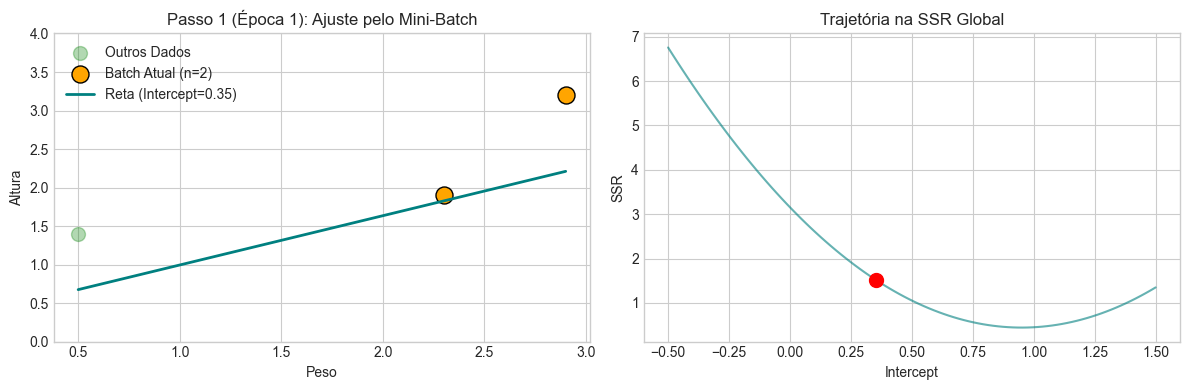

Batch: Old=0.000, Step=-0.354, New=0.354


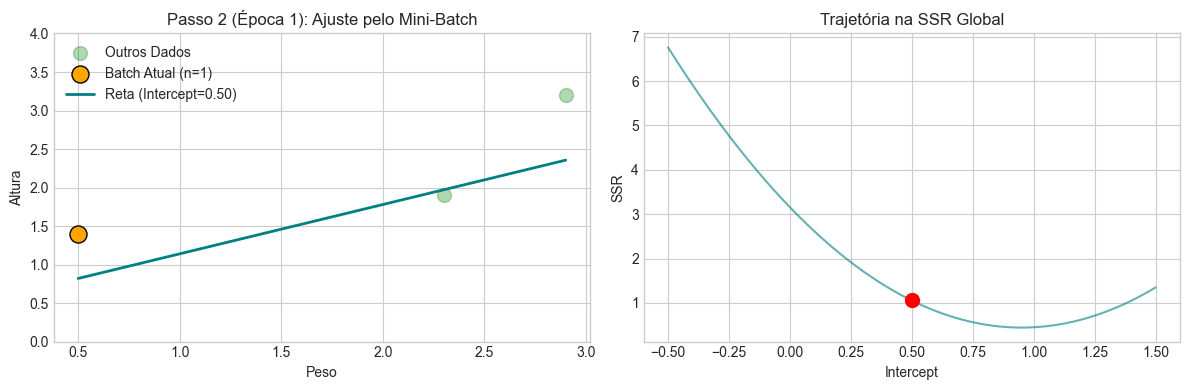

Batch: Old=0.354, Step=-0.145, New=0.500
Final Mini-Batch Intercept: 0.4995


In [13]:
def run_minibatch(learning_rate=0.1, epochs=5, batch_size=2):
    weights = np.array([0.5, 2.3, 2.9])
    heights = np.array([1.4, 1.9, 3.2])
    
    slope_fixed = 0.64
    intercept = 0.0

    intercept_vals = np.linspace(-0.5, 1.5, 100)
    ssr_vals = []
    for i in intercept_vals:
        predicted = i + slope_fixed * weights
        residuals_curve = heights - predicted
        ssr_vals.append(np.sum(residuals_curve**2))

    print(f"---Mini-batch GD com Gráficos  (Batch Size: {batch_size}) ---")

    step_count = 0

    for epoch in range(epochs):
        #embaralhar os dados
        indices = np.arange(len(weights))
        np.random.shuffle(indices)

        #vai criar as batches
        for start_idx in range(0, len(weights), batch_size):
            step_count += 1
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]

            #dados da batch
            w_batch = weights[batch_indices]
            h_batch = heights[batch_indices]

            #predicao e derivada somada para o batch
            pred_batch = intercept + slope_fixed * w_batch
            residuals = h_batch - pred_batch
            derivative = np.sum(-2 * residuals)

            step_size = derivative * learning_rate

            old_intercept = intercept
            intercept = intercept - step_size

            #VISUALIZACAO
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            #Ggrafico 1
            axes[0].scatter(weights, heights, color='green', s=100, alpha=0.3, label='Outros Dados')#reta de regressão
            axes[0].scatter(w_batch, h_batch, color='orange', s=150, edgecolors='black', label=f'Batch Atual (n={len(w_batch)})')#destaca o ponto

            predicted_all = intercept + slope_fixed * weights
            axes[0].plot(weights, predicted_all, color='teal', linewidth=2, label=f'Reta (Intercept={intercept:.2f})')

            axes[0].set_title(f"Passo {step_count} (Época {epoch+1}): Ajuste pelo Mini-Batch")
            axes[0].set_xlabel("Peso")
            axes[0].set_ylabel("Altura")
            axes[0].legend()
            axes[0].set_ylim(0, 4)

            #grafico 2
            current_total_ssr = np.sum((heights - (intercept + slope_fixed * weights))**2)
            axes[1].plot(intercept_vals, ssr_vals, color='teal', alpha=0.6)
            axes[1].scatter(intercept, current_total_ssr, color='red', s=100, zorder=5)

            axes[1].set_title(f"Trajetória na SSR Global")
            axes[1].set_xlabel("Intercept")
            axes[1].set_ylabel("SSR")

            plt.tight_layout()
            plt.show()

            print(f"Batch: Old={old_intercept:.3f}, Step={step_size:.3f}, New={intercept:.3f}")
        
        return intercept

final_intercept_batch = run_minibatch()
print(f"Final Mini-Batch Intercept: {final_intercept_batch:.4f}")

## Questão D: Gradiente Descendente em Redes Neurais (Foco em $b_3$)

**Objetivo:** Reproduzir a demonstração dos slides 256-305.
* **Rede Neural:** Input -> Hidden Layer (2 nós, Softplus) -> Output.
* **Parâmetro a otimizar:** Apenas o viés (bias) **$b_3$**.
* **Função de Ativação:** Softplus `log(1 + e^x)`.
* **Dados:**
    * Dosage (Input): [0, 0.5, 1]
    * Observed (Target): [0, 1, 0]
* **Valores Fixos (dos slides):**
    * $w_1 = 3.34, b_1 = -1.43$
    * $w_2 = -3.53, b_2 = 0.57$
    * $w_3 = -1.22, w_4 = -2.30$ (Valores observados nos slides para o exemplo de otimização de b3).

In [14]:
def softplus(x):
    return np.log(1 + np.exp(x))

def run_nn_b3_optimization(learning_rate=0.1, max_iter=100, tolerance=0.001):
    #dados
    inputs = np.array([0, 0.5, 1])
    observed = np.array([0, 1, 0])
    
    #pesos fixos
    w1, b1 = 3.34, -1.43
    w2, b2 = -3.53, 0.57
    w3, w4 = -1.22, -2.30 
    
    #parâmetro a otimizar
    b3 = 0.0 #inicialização
    
    print(f"\n--- Otimizando b3 na Rede Neural (LR: {learning_rate}) ---")
    
    for i in range(max_iter):
        # CORREÇÃO: Inicializar a soma das derivadas antes de percorrer os dados
        total_derivative_b3 = 0.0
        
        # Loop pelos dados para calcular o gradiente total (Soma das derivadas)
        for j in range(len(inputs)):
            input_val = inputs[j]
            obs_val = observed[j]
            
            #neurônio 1 
            x1 = input_val * w1 + b1
            y1 = softplus(x1)
            
            #neurônio 2
            x2 = input_val * w2 + b2
            y2 = softplus(x2)
            
            predicted = (y1 * w3) + (y2 * w4) + b3
            
            #backpropagation para b3
            deriv = -2 * (obs_val - predicted) * 1
            
            # Acumular a derivada
            total_derivative_b3 += deriv
            
        step_size = total_derivative_b3 * learning_rate
        
        old_b3 = b3
        
        b3 = old_b3 - step_size
        
        print(f"Iter {i+1}: Old b3={old_b3:.3f}, Step Size={step_size:.3f}, New b3={b3:.3f}")
        
        #condição de parada por tolerância (se o passo for muito pequeno)
        if abs(step_size) < tolerance:
            print(f"-> Convergência alcançada em {i+1} iterações.")
            break
            
    return b3

final_b3 = run_nn_b3_optimization()
print(f"Valor final de b3: {final_b3:.2f}")


--- Otimizando b3 na Rede Neural (LR: 0.1) ---
Iter 1: Old b3=0.000, Step Size=-1.566, New b3=1.566
Iter 2: Old b3=1.566, Step Size=-0.626, New b3=2.192
Iter 3: Old b3=2.192, Step Size=-0.250, New b3=2.442
Iter 4: Old b3=2.442, Step Size=-0.100, New b3=2.542
Iter 5: Old b3=2.542, Step Size=-0.040, New b3=2.582
Iter 6: Old b3=2.582, Step Size=-0.016, New b3=2.598
Iter 7: Old b3=2.598, Step Size=-0.006, New b3=2.605
Iter 8: Old b3=2.605, Step Size=-0.003, New b3=2.607
Iter 9: Old b3=2.607, Step Size=-0.001, New b3=2.609
Iter 10: Old b3=2.609, Step Size=-0.000, New b3=2.609
-> Convergência alcançada em 10 iterações.
Valor final de b3: 2.61


## Questão E: Otimizando 3 Parâmetros ($w_3, w_4, b_3$)

**Objetivo:** Reproduzir slides 231-279.
* Agora otimizamos os pesos da conexão da camada oculta para a saída e o bias de saída simultaneamente.
* **Inicialização:** Aleatória para pesos, 0 para bias (conforme slide 231).

In [15]:
def softplus(x):
    return np.log(1 + np.exp(x))

def run_nn_3param_optmization(learning_rate=0.1, max_iter=1000, tolerance=0.0001):
    inputs = np.array([0, 0.5, 1])
    observed = np.array([0, 1, 0])
    
    #pesos fixos
    w1, b1 = 3.34, -1.43
    w2, b2 = -3.53, 0.57

    #parâmetros a otimizar
    np.random.seed(42)
    w3 = np.random.randn()
    w4 = np.random.randn()
    b3 = 0.0 

    print(f"\n --- Otimizando w3, w4, b3 simultaneamente ---")

    for i in range(max_iter):
        grad_w3 = 0.0
        grad_w4 = 0.0
        grad_b3 = 0.0

        for j in range(len(inputs)):
            input_val = inputs[j]
            obs_val = observed[j]

            y1 = softplus(input_val * w1 + b1) #ativa no superior 
            y2 = softplus(input_val * w2 + b2) #ativa o no inferior

            predicted = (y1 * w3) + (y2 * w4) + b3

            #parte comum da derivada (chain rule)
            base_deriv = -2 * (obs_val - predicted)

            #gradienetes especificos

            grad_w3 += base_deriv * y1 #derivada em relação a w3
            grad_w4 += base_deriv * y2 #derivada em relação a w4
            grad_b3 += base_deriv * 1 #derivada em relação a b3

        #calcula os step sizes
        step_w3 = grad_w3 * learning_rate
        step_w4 = grad_w4 * learning_rate
        step_b3 = grad_b3 * learning_rate

        #atualiza
        old_w3, old_w4, old_b3 = w3, w4, b3

        w3 = w3 - step_w3
        w4 = w4 - step_w4
        b3 = b3 - step_b3

        #print a cada 20 iterações
        if i % 20 == 0:
            print(f"Iter {i}:")
            print(f"   w3: Old={old_w3:.3f}, Step={step_w3:.3f}, New={w3:.3f}")
            print(f"   w4: Old={old_w4:.3f}, Step={step_w4:.3f}, New={w4:.3f}")
            print(f"   b3: Old={old_b3:.3f}, Step={step_b3:.3f}, New={b3:.3f}")

        #condição de parada por tolerância
        if abs(step_w3) < tolerance and abs(step_w4) < tolerance and abs(step_b3) < tolerance:
            print(f"-> Convergência alcançada na iteração {i}.")
            break

    print(f"\nValores Finais: w3={w3:.3f}, w4={w4:.3f}, b3={b3:.3f}")

run_nn_3param_optmization()


 --- Otimizando w3, w4, b3 simultaneamente ---
Iter 0:
   w3: Old=0.497, Step=0.309, New=0.188
   w4: Old=-0.138, Step=-0.030, New=-0.108
   b3: Old=0.000, Step=0.069, New=-0.069
Iter 20:
   w3: Old=-0.169, Step=0.012, New=-0.180
   w4: Old=-0.312, Step=0.022, New=-0.334
   b3: Old=0.608, Step=-0.022, New=0.630
Iter 40:
   w3: Old=-0.378, Step=0.009, New=-0.387
   w4: Old=-0.709, Step=0.018, New=-0.727
   b3: Old=1.007, Step=-0.018, New=1.025
Iter 60:
   w3: Old=-0.545, Step=0.007, New=-0.552
   w4: Old=-1.027, Step=0.014, New=-1.041
   b3: Old=1.326, Step=-0.014, New=1.340
Iter 80:
   w3: Old=-0.679, Step=0.006, New=-0.685
   w4: Old=-1.282, Step=0.011, New=-1.293
   b3: Old=1.582, Step=-0.011, New=1.593
Iter 100:
   w3: Old=-0.786, Step=0.005, New=-0.791
   w4: Old=-1.486, Step=0.009, New=-1.495
   b3: Old=1.786, Step=-0.009, New=1.795
Iter 120:
   w3: Old=-0.872, Step=0.004, New=-0.875
   w4: Old=-1.649, Step=0.007, New=-1.656
   b3: Old=1.950, Step=-0.007, New=1.957
Iter 140:
   w